In [1]:
from __future__ import print_function, division

%matplotlib inline

import thinkdsp
import thinkplot
import numpy as np
import math

import warnings
warnings.filterwarnings('ignore')

from IPython.html.widgets import interact, interact_manual, fixed
from IPython.html import widgets
from IPython.display import display

PI2 = 2 * math.pi

## Exercise
The triangle and square waves have odd harmonics only; the sawtooth wave has both even and odd harmonics. The harmonics of the square and sawtooth waves drop off in proportion to $1/f$; the harmonics of the triangle wave drop off like $1/f^2$. Can you find a waveform that has even and odd harmonics that drop off like $1/f^2$?

Hint: There are two ways you could approach this: you could construct the signal you want by adding up sinusoids, or you could start with a signal that is similar to what you want and modify it.三角波和方波僅具有奇次諧波；鋸齒波同時具有偶次和奇次諧波。方波和鋸齒波的諧波按$ 1 / f $的比例下降；三角波的諧波像$ 1 / f ^ 2 $一樣下降。您能找到具有偶次和奇次諧波下降的波形，例如$ 1 / f ^ 2 $嗎？

提示：有兩種方法可以解決此問題：可以通過添加正弦波來構造所需的信號，或者可以從與所需信號相似的信號開始並進行修改。

## Solution
One option is to start with a sawtooth wave, which has all of the harmonics we need:一種選擇是從鋸齒波開始，該鋸齒波具有我們需要的所有諧波：


In [3]:
freq = 500
signal = thinkdsp.SawtoothSignal(freq=freq)
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

Here's what the spectrum looks like. The harmonics drop off like $1/f$.
這是頻譜的樣子。諧波像$ 1 / f $一樣下降。

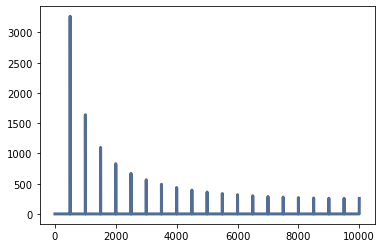

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()

If we apply the filter we wrote in the previous exercise, we can make the harmonics drop off like $1/f^2$.
如果應用在上一個練習中編寫的濾波器，我們可以使諧波像$ 1 / f ^ 2 $一樣下降。



In [9]:
def filter_spectrum(spectrum):
    spectrum.hs /= spectrum.fs
    spectrum.hs[0] = 0

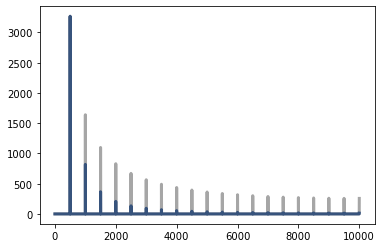

In [10]:
spectrum.plot(color='gray')
filter_spectrum(spectrum)
spectrum.scale(freq)
spectrum.plot()

Here's what it sounds like:

In [11]:
wave = spectrum.make_wave()
wave.make_audio()

And here's what the waveform looks like.

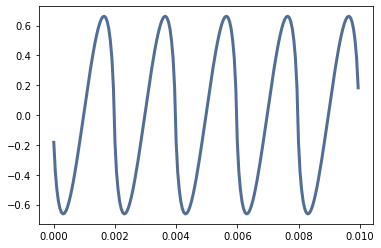

In [12]:
wave.segment(duration=0.01).plot()



It's an interesting shape, but not easy to see what its functional form is.

Another approach is to add up a series of cosine signals with the right frequencies and amplitudes.這是一個有趣的形狀，但不容易看出它的功能形式是什麼。

另一種方法是將頻率和幅度正確的一系列餘弦信號相加。

In [13]:
freqs = np.arange(500, 9500, 500)
amps = 1 / freqs**2
signal = sum(thinkdsp.CosSignal(freq, amp) for freq, amp in zip(freqs, amps))
signal

Here's what the spectrum looks like:

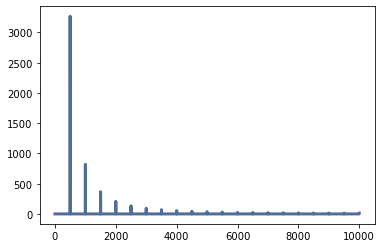

In [14]:
spectrum = wave.make_spectrum()
spectrum.plot()

Here's what it sounds like:

In [15]:
wave = signal.make_wave(duration=0.5, framerate=20000)
wave.make_audio()

And here's what the waveform looks like.

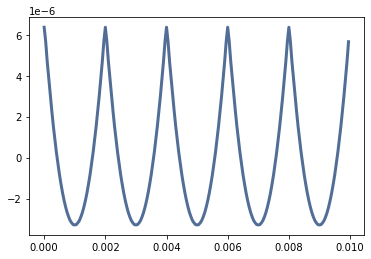

In [16]:
wave.segment(duration=0.01).plot()

If those look to you like parabolas, you might be right. thinkdsp provides ParabolicSignal, which computes parabolic waveforms.

如果那些看起來像拋物線，那麼您可能是對的。 thinkdsp提供了ParabolicSignal，用於計算拋物線波形。

In [17]:
wave = thinkdsp.ParabolicSignal(freq=500).make_wave(duration=0.5, framerate=20000)
wave.make_audio()


Here's what the waveform looks like:

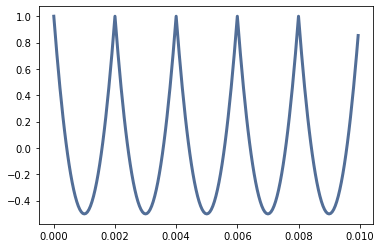

In [18]:
wave.segment(duration=0.01).plot()

A parabolic signal has even and odd harmonics which drop off like $1/f^2$:拋物線信號具有偶次和奇次諧波，其下降像$ 1 / f ^ 2 $：


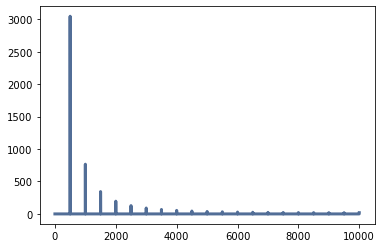

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot()